<a href="https://colab.research.google.com/github/YaraMansour1985/prediction-of-Product-Sales/blob/main/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metabolic Syndrome Prediction
## Yara Mansour


In [15]:
#mount drive on google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
#load data
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/05-IntermediateML/Week17/Data/Metabolic  Syndrome.csv')
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


#explore and clean data

In [17]:
#data info check
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [18]:
#identify and drop duplicates
df.duplicated().sum()
df=df.drop_duplicates()


In [19]:
#check missing values
df.isnull().sum()

,0
seqn,0
Age,0
Sex,0
Marital,208
Income,117
Race,0
WaistCirc,85
BMI,26
Albuminuria,0
UrAlbCr,0


In [20]:
#identify inconsistencies and addressing them, obtain value_counts in string columns
#identify string column
string_columns = df.select_dtypes(include=['object']).columns
print(string_columns)

for col in string_columns:
    print(f"Value Counts for {col}")
    print(df[col].value_counts())
    print("\n")

Index(['Sex', 'Marital', 'Race', 'MetabolicSyndrome'], dtype='object')
Value Counts for Sex
Sex
Female    1211
Male      1190
Name: count, dtype: int64


Value Counts for Marital
Marital
Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: count, dtype: int64


Value Counts for Race
Race
White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: count, dtype: int64


Value Counts for MetabolicSyndrome
MetabolicSyndrome
No MetSyn    1579
MetSyn        822
Name: count, dtype: int64




In [21]:
#drop column seqn
df=df.drop('seqn',axis=1)

In [22]:
#define numeric and categorical features
numeric_features=['Age','WaistCirc','BMI','Albuminuria','UrAlbCr','UricAcid','BloodGlucose','HDL','Triglycerides','Income']
nominal_features=['Sex','Marital','Race']

In [23]:
#check target distribution
df['MetabolicSyndrome'].value_counts(normalize=True)


,proportion
MetabolicSyndrome,
No MetSyn,0.657643
MetSyn,0.342357


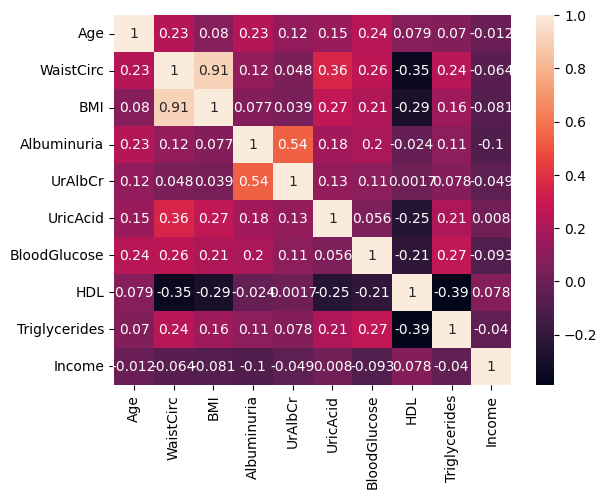

In [24]:
#create heatmap for numeric features
import seaborn as sns
import matplotlib.pyplot as plt
corr=df[numeric_features].corr()
sns.heatmap(corr,annot=True)
plt.show()

the heat map shows that these are strong predictors

Waist circumference strong positive relation with having metapolic syndrome(r=0.54)
BMI moderate positive
Triglycerides
Blood Glucose
HDL (inverse r=-0.21)

In [25]:
df['MetabolicSyndrome'].unique()

array(['No MetSyn', 'MetSyn'], dtype=object)

In [26]:
df['MetabolicSyndrome'] = df['MetabolicSyndrome'].str.strip().str.lower()

In [27]:
df['MetabolicSyndrome'] = df['MetabolicSyndrome'].map({
    'no metsyn': 0,
    'metsyn': 1
})

TypeError: 'Text' object is not callable

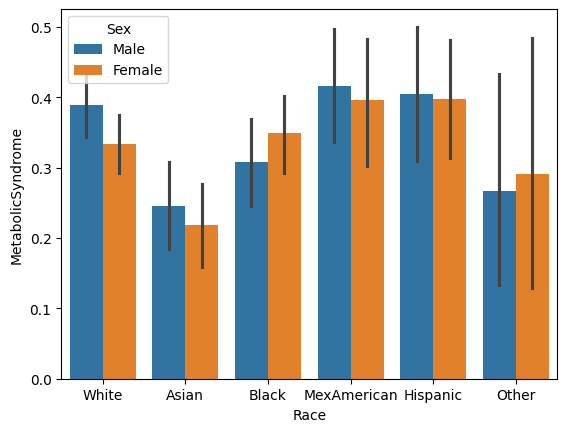

In [28]:
# create a bar plot for Race and MetabolicSyndrome  grouped by Sex
ax = sns.barplot(x='Race', y='MetabolicSyndrome', hue='Sex', data=df)
ax.title('Race vs MetabolicSyndrome')
plt.show()






This barplot shows how the likelihood of having Metabolic Syndrome varies across different racial groups, and how it differs between males and females within each group.

Key findings:
	•	Mexican American and Hispanic groups show the highest average rates of Metabolic Syndrome.
	•	White and Black groups show moderate levels.
	•	Asian participants show the lowest rates.
	•	In most racial groups, males have a slightly higher prevalence than females

#Choose a model

#Preprocessing data

In [29]:
# import standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
# import linear regression
from sklearn.linear_model import LinearRegression
#import knn
from sklearn.neighbors import KNeighborsClassifier
# import train test split
from sklearn.model_selection import train_test_split
#import logistic regression
from sklearn.linear_model import LogisticRegression
# import pipeline creator
from sklearn.pipeline import make_pipeline
# import metrics
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [30]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict



In [31]:
# Arrange data into features matrix & target vector
target = "MetabolicSyndrome"
X = df.drop(columns=target)
y = df[target]

In [32]:
# Validation Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
y_train.value_counts(normalize=True)

,proportion
MetabolicSyndrome,
0,0.656667
1,0.343333


In [33]:
#handle missing values by replacing income,WaistCirc, BMI  with median age, and Marital with unknown
import numpy as np
median_Income=df['Income'].median()
print(median_Income)
median_WaistCirc = df['WaistCirc'].median()
median_BMI = df['BMI'].median()
df['Income'] = df['Income'].replace(np.nan, median_Income)
df['WaistCirc'] = df['WaistCirc'].replace(np.nan, median_WaistCirc)
df['BMI'] = df['BMI'].replace(np.nan, median_BMI)
df['Marital'] = df['Marital'].replace(np.nan, 'Unknown')

#recheck null values
df.isnull().sum()

2500.0


,0
Age,0
Sex,0
Marital,0
Income,0
Race,0
WaistCirc,0
BMI,0
Albuminuria,0
UrAlbCr,0
UricAcid,0


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
smote=SMOTE()
# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('nom', nominal_transformer, nominal_features)
    ]
)
print (preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'WaistCirc', 'BMI', 'Albuminuria',
                                  'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
                                  'Triglycerides', 'Income']),
                                ('nom',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Marital', 'Race'])])


In [35]:
 #Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE only on the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("Before SMOTE class distribution:\n", y_train.value_counts())
print("After SMOTE class distribution:\n", pd.Series(y_train_resampled).value_counts())

Before SMOTE class distribution:
 MetabolicSyndrome
0    1182
1     618
Name: count, dtype: int64
After SMOTE class distribution:
 MetabolicSyndrome
1    1182
0    1182
Name: count, dtype: int64


In [36]:
# make and fit a pipe with preprocessing
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline # Use imblearn's pipeline to integrate SMOTE

# Fit preprocessor on original training data
X_train_processed = preprocessor.fit_transform(X_train)

# Apply SMOTE on the processed training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Create a pipeline with Logistic Regression
# Note: The preprocessor is not needed in this pipeline anymore as data is already processed and resampled
log_pipe_smote = LogisticRegression(max_iter=1000, random_state=42)

# Fit the Logistic Regression model on the resampled and processed training data
log_pipe_smote.fit(X_train_resampled, y_train_resampled)

# Transform the test data using the fitted preprocessor
X_test_processed = preprocessor.transform(X_test)
#get predictions
y_pred = log_pipe_smote.predict(X_test_processed)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1182
           1       0.83      0.85      0.84      1182

    accuracy                           0.84      2364
   macro avg       0.84      0.84      0.84      2364
weighted avg       0.84      0.84      0.84      2364



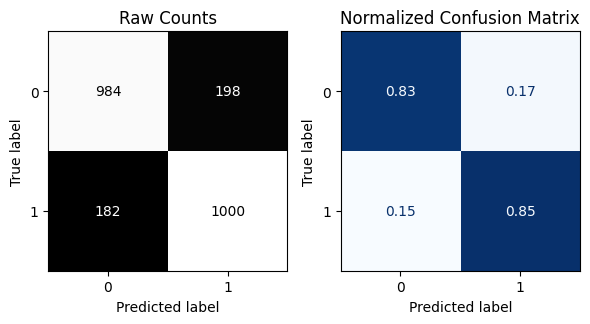


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       397
           1       0.72      0.80      0.76       204

    accuracy                           0.83       601
   macro avg       0.81      0.82      0.81       601
weighted avg       0.83      0.83      0.83       601



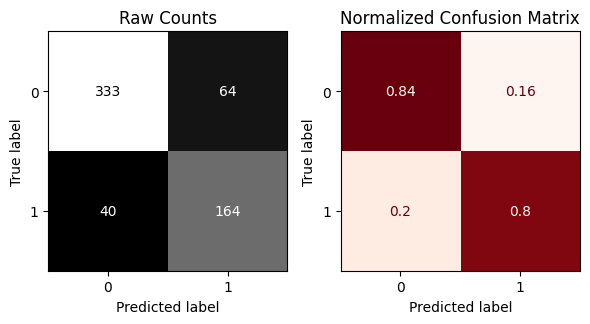

In [37]:
# Evaluate the log_pipe_smote pipeline
evaluate_classification(log_pipe_smote, X_train_resampled, y_train_resampled, X_test_processed, y_test)

The Logistic Regression model achieved balanced performance on both training (accuracy = 0.84) and test (accuracy = 0.83) data, indicating good generalization with no clear signs of overfitting or underfitting. Precision, recall, and F1-scores were consistent across classes

# extract and visualize the feature importances determined by the model

In [43]:
# Get the coefficients (feature importances for Logistic Regression)
coefficients = log_pipe_smote.coef_[0]

# Get the feature names after preprocessing
# Get names of numeric features
numeric_feature_names = preprocessor.transformers_[0][2]

# Get names of one-hot encoded categorical features
# Access the OneHotEncoder within the nominal transformer pipeline
onehot_encoder = preprocessor.transformers_[1][1].steps[1][1]
onehot_features = onehot_encoder.get_feature_names_out(nominal_features)

# Combine all feature names
feature_names = list(numeric_feature_names) + list(onehot_features)


feature_importance = pd.Series(coefficients, index=feature_names,
                        name='Feature Importances')
# Sort feature importances and display all
print(feature_importance.sort_values(ascending=False))

Triglycerides        1.478667
WaistCirc            1.267194
BloodGlucose         0.956726
Age                  0.699620
Sex_Female           0.540858
Marital_Separated    0.398760
Race_MexAmerican     0.214211
Marital_Single       0.207607
UricAcid             0.173323
Race_Hispanic        0.055520
Albuminuria          0.032600
UrAlbCr             -0.005176
Marital_Married     -0.007536
Income              -0.036175
Race_Black          -0.049066
BMI                 -0.069234
Race_Asian          -0.075526
Marital_Divorced    -0.113750
Race_White          -0.115945
Race_Other          -0.253462
HDL                 -0.679313
Marital_Widowed     -0.709349
Sex_Male            -0.765126
Name: Feature Importances, dtype: float64


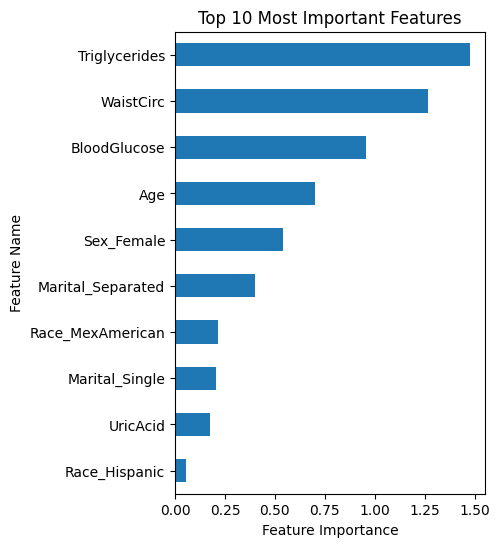

In [44]:
ax = feature_importance.sort_values().tail(10).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Feature Importance',
       title='Top 10 Most Important Features');

Feature importance observations for metabolic syndrome prediction
This analysis confirms our model's reliance on clinically relevant features. The top predictors—Triglycerides, Waist Circumference, and Blood Glucose—are key diagnostic criteria for metabolic syndrome, validating our approach. The model accurately identifies high levels of these factors as strong indicators of risk.
Age is a significant positive predictor, reflecting the increased risk of metabolic syndrome with advancing years. HDL cholesterol, a protective factor, appropriately appears with a negative importance score, indicating that higher levels decrease the predicted risk.
Social and demographic factors also play a role. Marital status categories, particularly being separated, and race, specifically Mexican American in this context, were identified as minor but relevant predictors, suggesting potential links between social determinants and metabolic health. Gender was also found to be an important factor, with different impacts for males and females.
Features with near-zero importance, such as income and certain marital statuses, suggest they are less useful for this model's predictions. This is likely because the more direct clinical measurements already capture the primary drivers of risk. Overall, the model's feature importance aligns well with medical knowledge, providing a strong basis for its predictions.

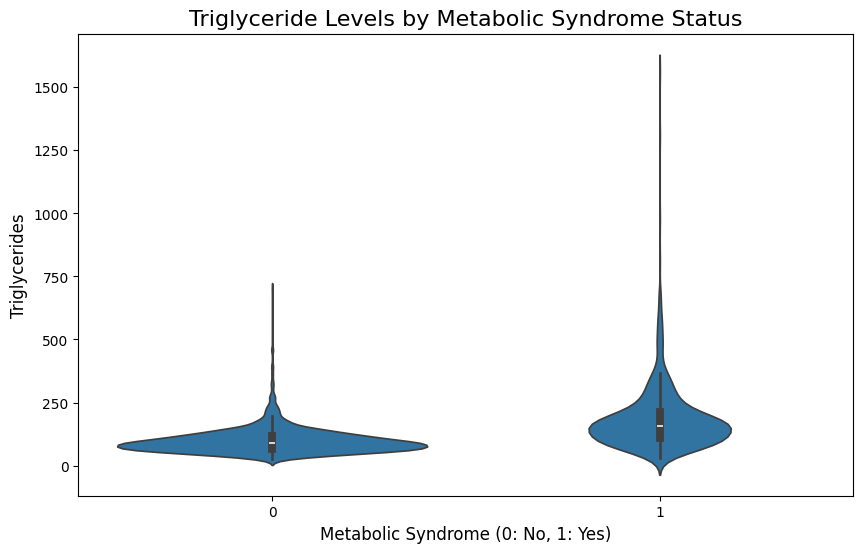

In [45]:
# explanatory Visualization of the important features
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
sns.violinplot(x='MetabolicSyndrome', y='Triglycerides', data=df)
plt.title('Triglyceride Levels by Metabolic Syndrome Status', fontsize=16)
plt.xlabel('Metabolic Syndrome (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Triglycerides', fontsize=12)
plt.show()

this is a violin plot for triglycerides the most important feature with metabolic syndrome, it shows: A clear difference in the distribution of triglyceride values between the "no metabolic syndrome" and "yes metabolic syndrome" groups.

conclusion :High triglycerides are a known risk factor and a diagnostic criterion. The plot visually confirms that higher triglyceride levels are strongly associated with a metabolic syndrome diagnosis

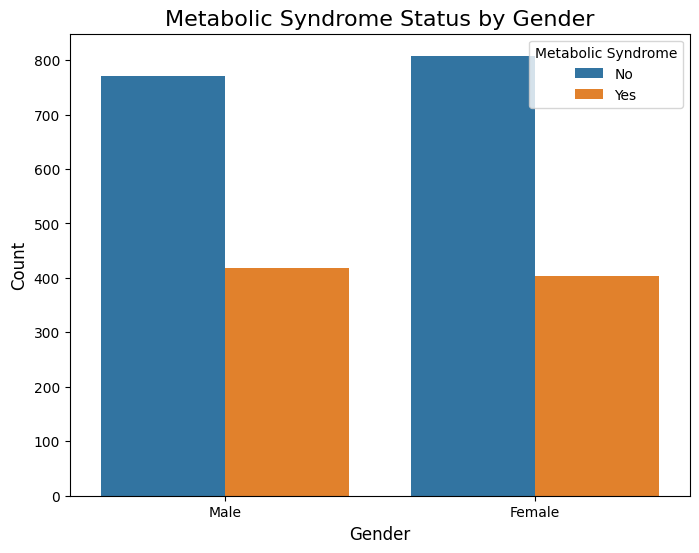

In [46]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='MetabolicSyndrome', data=df)
plt.title('Metabolic Syndrome Status by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Metabolic Syndrome', loc='upper right', labels=['No', 'Yes'])
plt.show()

sex was also a highly important feature.
Describe what the visualization shows: The difference in the count of metabolic syndrome cases between males and females'
 The plot reveals how sex-based differences influence the risk of metabolic syndrome within your dataset, which aligns with medical knowledge that sex is an important factor.